In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")


In [6]:
df=pd.read_table("winequality-red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.head()# we need to predict wine quality. This is a multiclassification problem

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.shape

(1599, 12)

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Fixed acidity is having skewness. Volatile acidity is kind of normal. Don't check statistics for the quality.Ignore cols with min skewness.Total sulphurdioxide is highly skewed.

Now, checking the above diagramatically.

In [12]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
df.groupby("quality").size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [17]:
from scipy.stats import skew

fixed acidity
0.9818292953262073


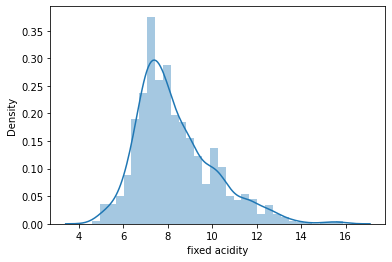

volatile acidity
0.6709623963499574


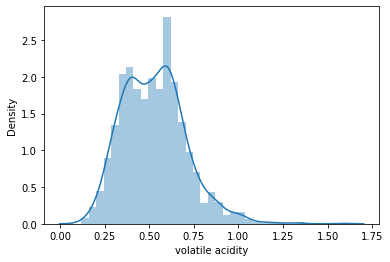

citric acid
0.3180385895475358


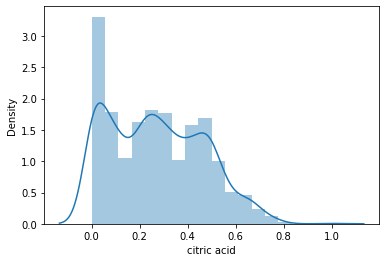

residual sugar
4.536394788805638


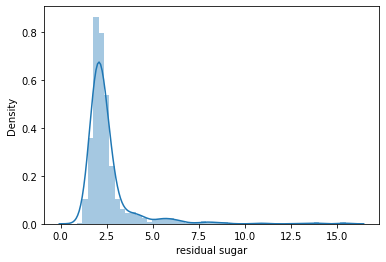

chlorides
5.675016527504259


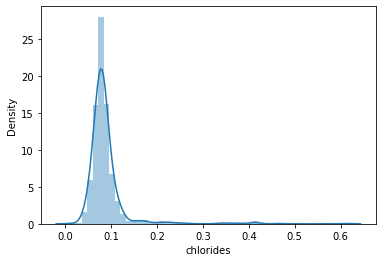

free sulfur dioxide
1.249393847434253


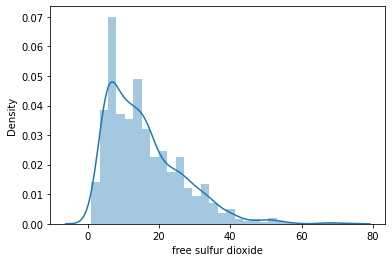

total sulfur dioxide
1.5141091878506638


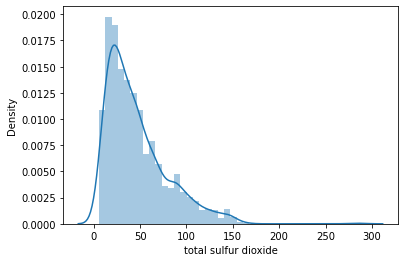

density
0.07122077153539946


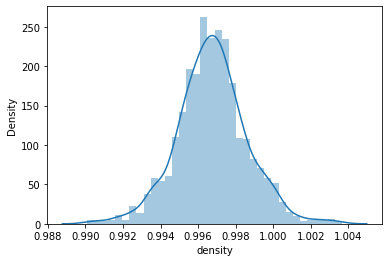

pH
0.19350175891005525


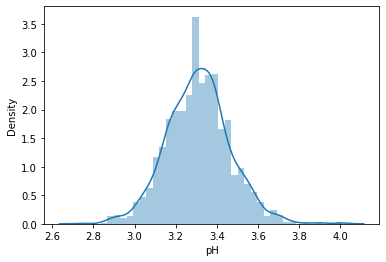

sulphates
2.426393455449087


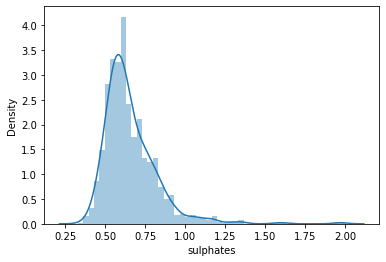

alcohol
0.8600210646566755


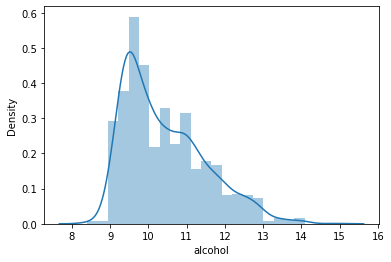

In [18]:
for col in X:
    print(col)
    print(skew(X[col]))
    
    plt.figure()
    sns.distplot(X[col])
    plt.show()

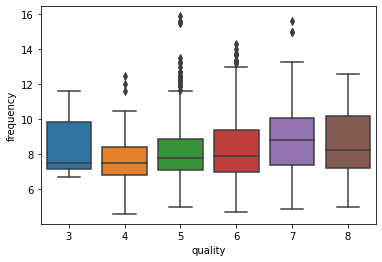

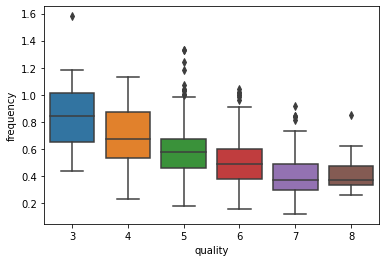

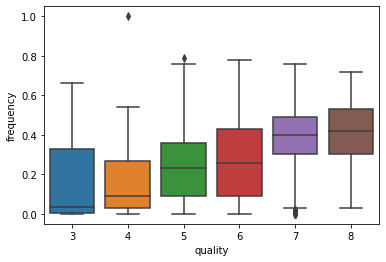

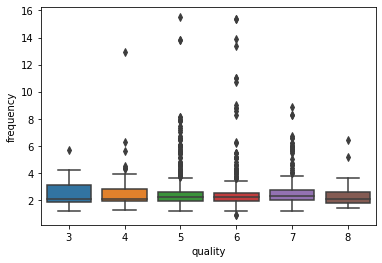

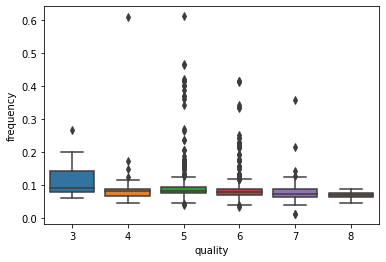

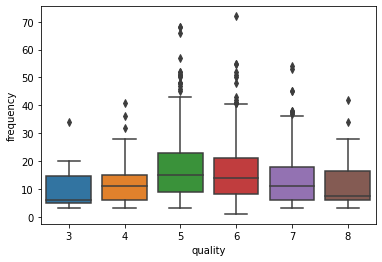

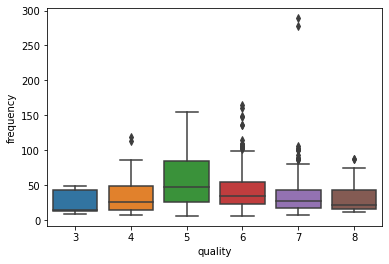

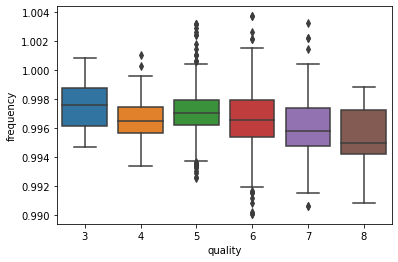

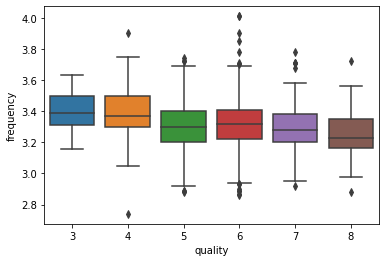

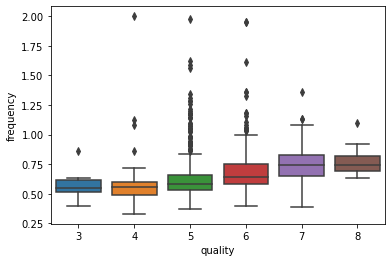

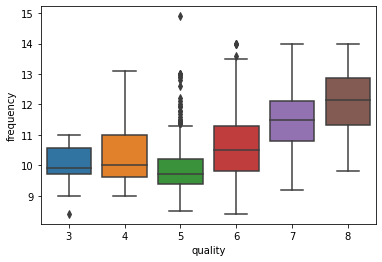

In [21]:
# Now checking for outliers.

for col in X:
  plt.figure()
  sns.boxplot(data=df,x='quality',y=col)# data=df because we want to see target as well.
  plt.ylabel("frequency")
  plt.show()

now checking for multicollinearity

In [24]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


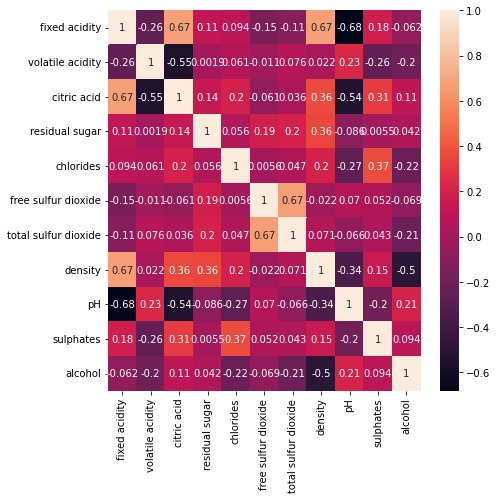

In [26]:
plt.figure(figsize=(7,7))
sns.heatmap(X.corr(),annot=True)
plt.show()
 # very light color is highly +vely skewed, very dark highly -vely skewed.
 #Anything between doesn't have any skewness.
 #0.67-fixed acidity and density, and citric acid
 #dencity and citric acid -not much.
# lookin at darkest one- phand fixed acidity
#i.e. fixed acidity has correlation with many cols, both -ve and +ve.
# so we can get rid of fixed acidity.Butshall we do it right now..? First build basic model.
# if scores are not good, then. 


In [31]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [40]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
model.score(X_train,y_train)

1.0

In [41]:
y_pred=model.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.14      0.15        21
           5       0.65      0.64      0.65       207
           6       0.61      0.56      0.59       195
           7       0.43      0.58      0.49        52
           8       0.33      0.33      0.33         3

    accuracy                           0.58       480
   macro avg       0.36      0.38      0.37       480
weighted avg       0.58      0.58      0.58       480



Score is very very poor. Accuracy is only 59%. For category 5,6 and 7, scores are still better but for 3 , it was 0.This is a clear case of overfitting.Training score 100%, testing only 59%. Above decision tree we built on giniindex , now building our model using entropy.

In [37]:
model2=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
y_pred=model2.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.14      0.15        21
           5       0.65      0.64      0.65       207
           6       0.61      0.56      0.59       195
           7       0.43      0.58      0.49        52
           8       0.33      0.33      0.33         3

    accuracy                           0.58       480
   macro avg       0.36      0.38      0.37       480
weighted avg       0.58      0.58      0.58       480



accuracy is even lower.

Now,talkin about solution. In decision tree, good features are at top, andbad features at bottom. Low bias high variance- overfitting, occurs when complexity or no.of features are high. Now,what if we can tell , that our tree can grow upto a maxi depth of 3, then the bad features are taken away or removed, and that's how u can avoid overfitting. And this technique is known as pruning. 

Now,in regularization, we add some error in training data,so that we get better result in testing data.

Another technique is min_samples_leaf,indirectly ,this alsoreduce depth of the tree.

In [44]:
model.get_depth() # gives,max value that our tree has reached.

21

In [45]:
model3=DecisionTreeClassifier(max_depth=15,min_samples_leaf=8)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=8)

In [47]:
y_pred=model3.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.71      0.67       207
           6       0.54      0.56      0.55       195
           7       0.44      0.37      0.40        52
           8       0.00      0.00      0.00         3

    accuracy                           0.57       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.54      0.57      0.56       480



No improvement.

The solution is -we can try to normalize our data. Second thing we can try is random oversampling or random under sampling.In random under sampling,u add random data to the lesser present category.random over sampling is , we remove data from over present category.

In [49]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
ros=RandomOverSampler(random_state=1)
X_sample,y_sample=ros.fit_resample(X_train,y_train) # we get new training data
#we apply only on training data and not on testing data.

In [55]:
y_sample.value_counts() #now,our quality is balanced.

5    474
6    474
7    474
8    474
4    474
3    474
Name: quality, dtype: int64

In [57]:
model=DecisionTreeClassifier()
model.fit(X_sample,y_sample)

DecisionTreeClassifier()

In [60]:
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.31      0.19      0.24        21
           5       0.66      0.70      0.68       207
           6       0.60      0.56      0.58       195
           7       0.47      0.50      0.49        52
           8       0.17      0.33      0.22         3

    accuracy                           0.59       480
   macro avg       0.37      0.38      0.37       480
weighted avg       0.59      0.59      0.59       480



Not any improvement of model.But accuracy of individual category is improved. like category 4 and 8.

In [62]:
model6=DecisionTreeClassifier(max_depth=15,min_samples_leaf=5)
model6.fit(X_sample,y_sample)
y_pred=model6.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.19      0.21        21
           5       0.67      0.68      0.67       207
           6       0.60      0.57      0.58       195
           7       0.42      0.42      0.42        52
           8       0.09      0.33      0.14         3

    accuracy                           0.58       480
   macro avg       0.33      0.37      0.34       480
weighted avg       0.59      0.58      0.58       480



Our accuracy is not increasing.In above kind of cases,try for other algorithms,which might give u a better score. 